# Comp 6934 Winter 2025 Note 9

by E Brown.



# Simple descriptive stats

Visualization of data sets is an attempt to understand what the data is telling us - some story or information about the data set. Bur this can be coupled with desriptive statistics, which often give us information about the data set without the added complexity of interpreting a plot.

The describe function is a good way to start:

In [4]:
import pandas as pd

df = pd.read_csv("datasets/jash312i/NL_weather.csv")

/tmp/ipykernel_61101/2141896256.py:3: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/jash312i/NL_weather.csv")


In [5]:
df_temp = df[['Station Name', "Date/Time", "Mean Temp (C)"]]
df_temp = df_temp.dropna()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89733 entries, 1 to 99656
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station Name   89733 non-null  object 
 1   Date/Time      89733 non-null  object 
 2   Mean Temp (C)  89733 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


In [81]:
df_temp

,Station Name,Date/Time,Mean Temp (C)
1,ARGENTIA (AUT),2022-07-23,17.9
2,ARGENTIA (AUT),2022-07-24,16.7
3,ARGENTIA (AUT),2022-07-25,17.4
4,ARGENTIA (AUT),2022-07-26,17.3
5,ARGENTIA (AUT),2022-07-27,16.8
...,...,...,...
99652,WABUSH A,2023-12-27,-11.3
99653,WABUSH A,2023-12-28,-13.1
99654,WABUSH A,2023-12-29,-9.2
99655,WABUSH A,2023-12-30,-8.8


In [76]:
df_temp.describe()

,Mean Temp (C)
count,89733.000000
mean,3.848710
std,9.659292
min,-36.900000
25%,-2.400000
50%,3.800000
75%,11.200000
max,27.300000


## Boxplot

The boxplot depicts many of the same summary statistics, in a visual manner. It can give a quicker impression at a glance than the numberical values, and also shows a bit more depiction of outlier values. Here is the description from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

>The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box to the farthest data point lying within 1.5x the inter-quartile range (IQR) from the box. Flier points are those past the end of the whiskers. See https://en.wikipedia.org/wiki/Box_plot for reference.

In [7]:
import matplotlib.pyplot as plt

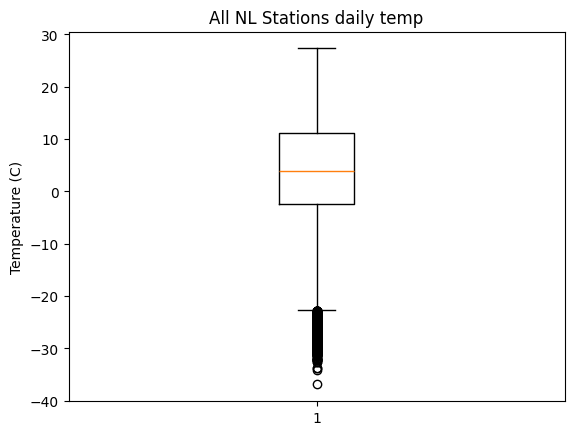

In [8]:
plt.boxplot('Mean Temp (C)', data=df_temp)
plt.title('All NL Stations daily temp')
plt.ylabel('Temperature (C)')
plt.show()

Often, we want to compare the distribution of observations by plotting parallel box plots. Let's select three weather stations for comparison: 

In [9]:
df_reduced = df_temp[df_temp['Station Name'].isin(['GANDER INTL A',"ST. JOHN'S INTL A",'STEPHENVILLE A' ])]
 

While it is possible to draw boxplots based on Pandas groupings, the matplotlib interface makes it complicated. It's so bad that pandas provides its own interface to the matplotlib boxplot methods, very useful for parallel boxplots:

Mean Temp (C)    {'whiskers': [Line2D(_nolegend_), Line2D(_nole...
dtype: object


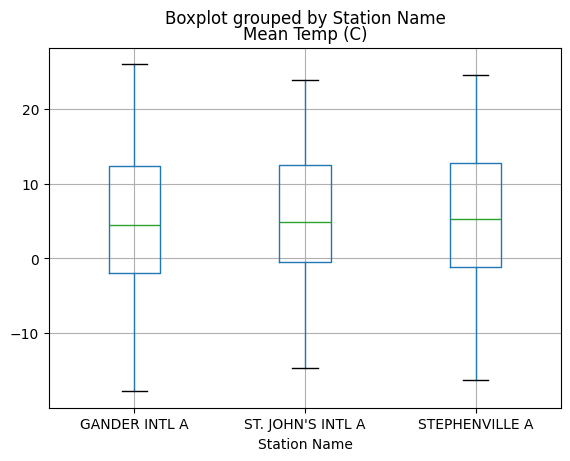

In [14]:
pd.plotting.boxplot(by='Station Name', column=['Mean Temp (C)'], data=df_reduced)

For more on the pandas extra matplotlib methods, see the docs: https://pandas.pydata.org/docs/reference/plotting.html

Most standard matplotlib methods are also available as DataFrame plot methods: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

## Histogram

Histograms are another common way to get a look at how observation values might be distributed. The basic idea is to break the range of observations into intervals (or 'bins' as they are called for histograms), and count how many observations fall into each interval. The histogram counts are typically plotted as a bar plot, which is also called a histogram. (Technically, it is the bin counts that comprise the histogram, but usually people think of the plot when you say histogram.) 

(array([1.000e+00, 4.000e+00, 3.900e+01, 8.300e+01, 1.280e+02, 2.390e+02,
        3.260e+02, 5.400e+02, 6.260e+02, 8.180e+02, 1.127e+03, 1.625e+03,
        2.335e+03, 3.295e+03, 4.797e+03, 5.715e+03, 6.864e+03, 8.535e+03,
        7.544e+03, 7.656e+03, 6.596e+03, 5.587e+03, 5.636e+03, 5.246e+03,
        5.263e+03, 4.663e+03, 2.738e+03, 1.346e+03, 3.180e+02, 4.300e+01]),
 array([-36.9 , -34.76, -32.62, -30.48, -28.34, -26.2 , -24.06, -21.92,
        -19.78, -17.64, -15.5 , -13.36, -11.22,  -9.08,  -6.94,  -4.8 ,
         -2.66,  -0.52,   1.62,   3.76,   5.9 ,   8.04,  10.18,  12.32,
         14.46,  16.6 ,  18.74,  20.88,  23.02,  25.16,  27.3 ]),
 <BarContainer object of 30 artists>)

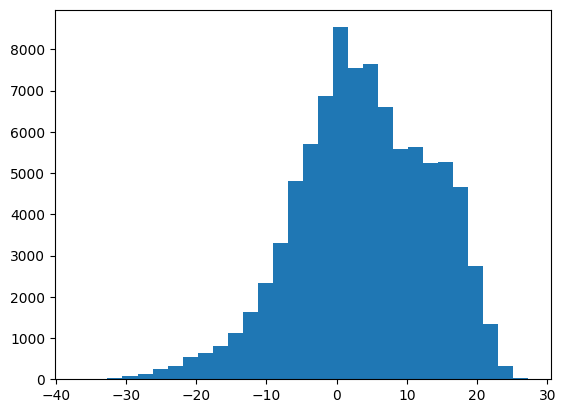

In [17]:
plt.hist('Mean Temp (C)', data=df_temp, bins=30)

It is often meaningful to specify the bin edges to help the viewer interpret the histogram. Let's set our bin edges at every 5 degrees.

In [123]:
bin_edges = np.linspace(-40,35,(40+35)//5 +1)
bin_edges

array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,
        15.,  20.,  25.,  30.,  35.])

Text(0.5, 1.0, 'Histogram of NL Temperatures')

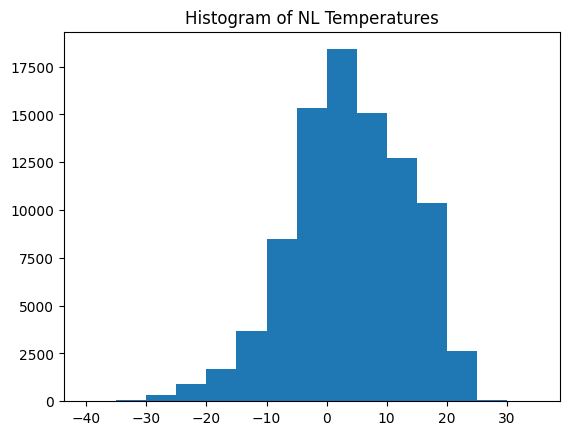

In [124]:
plt.hist('Mean Temp (C)', data=df_temp, bins=bin_edges)
plt.title('Histogram of NL Temperatures')

# Normal distribution

We'll be moving into inferential statistics in the next note sets, so reviewing the normal distribution is a good way to start

For examples, the t-test and simple linear regression as examples of the many (and most more advanced) basic stats tests available in numpy, scipy and pandas environments, and all rely on understanding probability distribution and tyhe normal distribution in particular.

In [19]:
import numpy as np


You can ask numpy's random module for random numbers drawn from a uniform distribution, where all numbers are equally likely, or drawn from some other distribution.

In [17]:
np.random??

Type:        module
String form: <module 'numpy.random' from '/home/brown/courses/6934/jupenv/lib/python3.12/site-packages/numpy/random/__init__.py'>
File:        ~/courses/6934/jupenv/lib/python3.12/site-packages/numpy/random/__init__.py
Source:     
"""
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
PCG64DXSM
Philox
SFC64
============================================= ===

============================================= ===
Gett

Let's graph some samples drawn from the frequently used standard normal distribution, which distribution often appears in nature.

First, let's sample 1000 points from a standard normal distribution and count how many observations fall into various intervals.

Dividing a continuous variable into intervals for counting, can be plotted as a histogram.

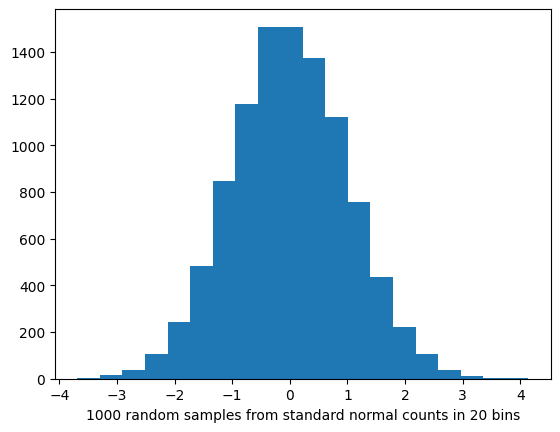

In [20]:
# one thousand random numbers on a bell curse with mean 0 and standard deviation  of 1
sample1000 = np.random.normal(0,1,10000)

# divide into bind and draw a histogram
plt.hist(sample1000, bins=20)
plt.xlabel("1000 random samples from standard normal counts in 20 bins")
plt.show()

We can also have the histogram accumulate counts from left to right:

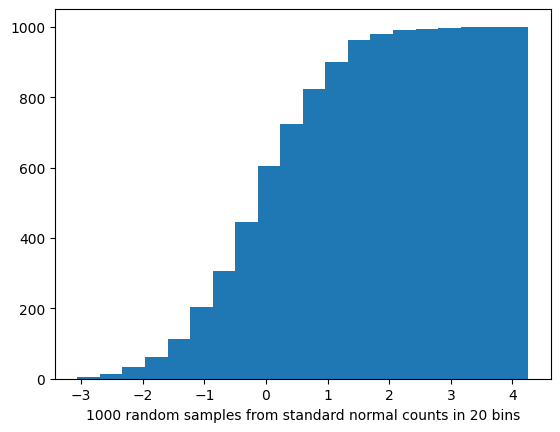

In [126]:
# divide into bind and draw a histogram
plt.hist(sample1000, bins=20, cumulative=True)
plt.xlabel("1000 random samples from standard normal counts in 20 bins")
plt.show()

### Plotting the theoretical distribution

Instead of plotting random samples (as a stand-in for actual observations), we move to plotting the shape of function that defines the normal distribution itself. 

We can plot a distribution representing the probability of the values being observed being below a value on the x-axis, given the same general shape as a cummulative probability (or distribution) function. Numpy does not expose the distribution functions, so we have to use the scipy package for the distribution function (unless we want to implement it ourselves). (Scipy will also do random numbers if you prefer it to numpy.)

In [23]:
norm.cdf(1)


np.float64(0.8413447460685429)

In [27]:
from scipy.stats import norm
import pandas as pd

# norm.cdf for normal cumulative/distribution function. 

x_vals = np.linspace(-3,3,200) # numbers from -3 to 3 equally spaced

stdn_df = pd.DataFrame( x_vals, columns = ['Observed Value'])
stdn_df['cdf'] = stdn_df['Observed Value'].apply(norm.cdf)
stdn_df

,Observed Value,cdf
0,-3.000000,0.001350
1,-2.969849,0.001490
2,-2.939698,0.001643
3,-2.909548,0.001810
4,-2.879397,0.001992
...,...,...
195,2.879397,0.998008
196,2.909548,0.998190
197,2.939698,0.998357
198,2.969849,0.998510


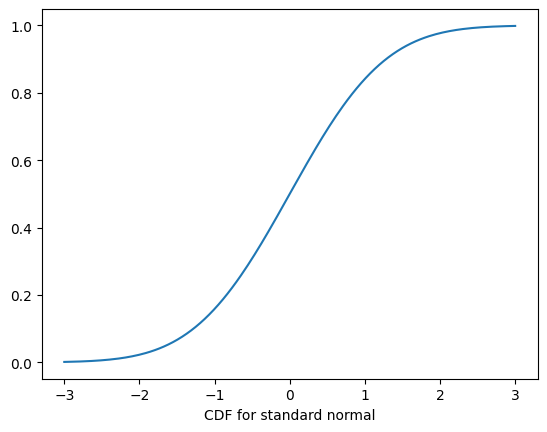

In [28]:
plt.plot('Observed Value', 'cdf', data=stdn_df)
plt.xlabel('CDF for standard normal')
plt.show()

The first derivative of the CDF the probability density function, which shape is much like our original histogram whith binned counts:

In [29]:
stdn_df['pdf'] = stdn_df['Observed Value'].apply(norm.pdf)
stdn_df

,Observed Value,cdf,pdf
0,-3.000000,0.001350,0.004432
1,-2.969849,0.001490,0.004849
2,-2.939698,0.001643,0.005301
3,-2.909548,0.001810,0.005790
4,-2.879397,0.001992,0.006318
...,...,...,...
195,2.879397,0.998008,0.006318
196,2.909548,0.998190,0.005790
197,2.939698,0.998357,0.005301
198,2.969849,0.998510,0.004849


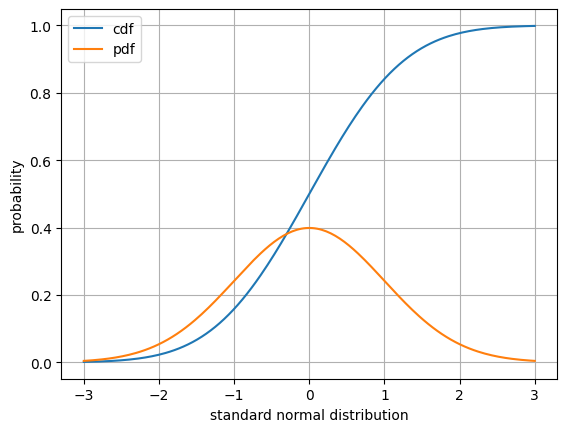

In [30]:
plt.plot('Observed Value', 'cdf', data=stdn_df, label='cdf')
plt.plot('Observed Value', 'pdf', data=stdn_df, label='pdf')
plt.xlabel('standard normal distribution')
plt.ylabel('probability')
plt.legend()
plt.grid()

plt.show()

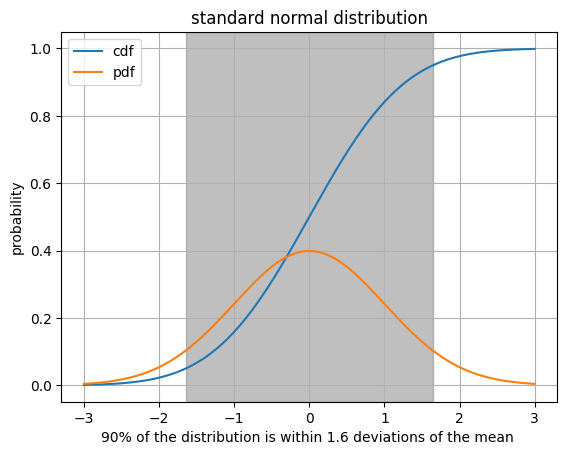

In [57]:
plt.plot('Observed Value', 'cdf', data=stdn_df, label='cdf')
plt.plot('Observed Value', 'pdf', data=stdn_df, label='pdf')
plt.xlabel('90% of the distribution is within 1.6 deviations of the mean ')
plt.title('standard normal distribution')
plt.ylabel('probability')
plt.legend()
plt.grid()
plt.axvspan(norm.ppf(0.05), norm.ppf(0.95), alpha=0.5, color='gray')

plt.show()